# EXERCISE 3

Create a model using K - Nearest Neighbors to perform classification using the personality dataset.
0 - 'introvert'
1 - 'extrovert'

## A. Import Libraries

In [536]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics



## B. Load and understand the dataset

In [537]:
df = pd.read_excel('personality.xlsx')
df

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality,Unnamed: 6,Unnamed: 7
0,Pamela,1,1,1,1135,1,NaN,0 is false
1,Shiela,0,0,0,200,0,NaN,1 is true
2,Gabriele,1,1,1,2426,1,NaN,NaN
3,Neal,0,1,1,596,1,NaN,NaN
4,Denise,1,0,0,100,0,NaN,NaN
5,Don,0,1,0,242,0,NaN,NaN
6,Justine,0,1,0,415,0,NaN,NaN
7,Ernest,0,0,1,136,0,NaN,NaN
8,Arjay,1,1,1,883,1,NaN,NaN
9,Aysen,1,1,1,1035,1,NaN,NaN


In [538]:
df.drop(columns=["Name", "Unnamed: 6", "Unnamed: 7"], inplace=True)

In [539]:
df.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,1,1,1,1135,1
1,0,0,0,200,0
2,1,1,1,2426,1
3,0,1,1,596,1
4,1,0,0,100,0


1. Display the summary of all the features of the dataset using .info()

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active in social media?      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


2. Display the total number of samples from each label using .value_counts()

In [541]:
df.value_counts()

Post/Share Frequently?  Active in social media?  Replies to comments?  Number of friends/followers  Personality
0                       0                        0                     107                          0              1
                                                                       200                          0              1
                                                                       204                          0              1
                                                                       220                          0              1
                                                                       254                          0              1
                                                                       273                          0              1
                                                                       348                          0              1
                                                                     

## C. Split the dataset into training and test set

3. Convert the features into an numpy array using .values() and store it in a variable "X"

In [542]:
X = df.drop(columns=['Personality']).values

4. Convert the features into an numpy array using .values() and store it in variable "y"

In [543]:
y = df['Personality'].values

5. Use train_test_split() to split the data
- declare a variable X_train that will hold the training data
- declare a variabke X_test that will hold the test data
- declare a variable y_train that will hold the label of the training data
- declare a variable y_test that will hold the label of the test data

In [544]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5
                                                    )

## D. Create the model

6.  Use KNN as a classifier by using KNeighborsClassifier()

In [545]:
knnClass = KNeighborsClassifier(n_neighbors=7)

7. Train the model using the .fit()

In [546]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

8. Test the model using the .predict()

In [547]:
y_pred = knnClass.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

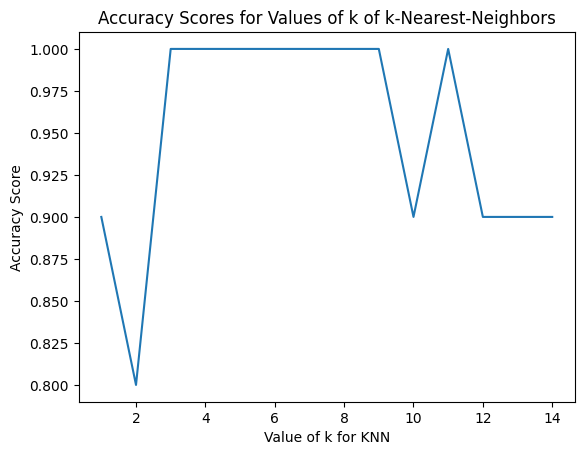

In [548]:
# experimenting with different n values
k_range = list(range(1,15))
scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [549]:
knnClass.predict([[0,1,0,1000]])

array([1])